In [1]:
import skrf as rf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ring_slot = rf.data.ring_slot

ring_slot

2-Port Network: 'ring slot',  75.0-110.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

In [3]:
# dummy 2-port network from Frequency and s-parameters
freq = rf.Frequency(1, 10, 101, 'ghz')
rng = np.random.default_rng()
s = rng.uniform(size=(101, 2, 2)) + 1j*rng.uniform(size=(101, 2, 2))  # random complex numbers
# if not passed, will assume z0=50. name is optional but it's a good practice.
ntwk = rf.Network(frequency=freq, s=s, name='random values 2-port')
ntwk

2-Port Network: 'random values 2-port',  1.0-10.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j]

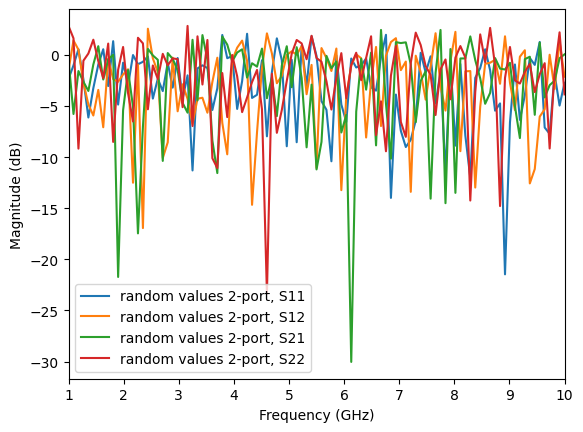

In [4]:
ntwk.plot_s_db()

In [5]:
# let's assume we have separate arrays for the frequency and s-parameters
f = np.array([1, 2, 3, 4]) # in GHz
S11 = rng.uniform(size=4)
S12 = rng.uniform(size=4)
S21 = rng.uniform(size=4)
S22 = rng.uniform(size=4)

# Before creating the scikit-rf Network object, one must forge the Frequency and S-matrix:
freq2 = rf.Frequency.from_f(f, unit='GHz')

# forging S-matrix as shape (nb_f, 2, 2)
# there is probably smarter way, but less explicit for the purpose of this example:
s = np.zeros((len(f), 2, 2), dtype=complex)
s[:,0,0] = S11
s[:,0,1] = S12
s[:,1,0] = S21
s[:,1,1] = S22

# constructing Network object
ntw = rf.Network(frequency=freq2, s=s, name='forged values 2-port')

print(ntw)

2-Port Network: 'forged values 2-port',  1.0-4.0 GHz, 4 pts, z0=[50.+0.j 50.+0.j]


In [6]:
z = 20
abcd = np.array([[1, z],
              [0, 1]])

a = np.tile(abcd, (len(freq),1,1))
ntw = rf.Network(frequency=freq, a=a)
print(ntw)

2-Port Network: '',  1.0-10.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j]


In [7]:
# example: converting a -> s
s = rf.a2s(a)
# checking that these S-params are the same
np.all(ntw.s == s)

True

In [8]:
np.shape(ring_slot.s)

(201, 2, 2)

In [9]:
ring_slot.s[:11,1,0]  # get first 10 values of S21

array([0.6134571 +0.36678139j, 0.6218194 +0.36403169j,
       0.63024301+0.36109574j, 0.63872415+0.3579682j ,
       0.64725874+0.35464377j, 0.65584238+0.35111711j,
       0.66447037+0.34738295j, 0.6731377 +0.34343602j,
       0.68183901+0.33927115j, 0.69056862+0.33488321j,
       0.6993205 +0.3302672j ])

In [10]:
ring_slot[0:10] #  Network for the first 10 frequency points

2-Port Network: 'ring slot_subset',  75.0-76.575 GHz, 10 pts, z0=[50.+0.j 50.+0.j]

In [11]:
ring_slot['80-90ghz']

2-Port Network: 'ring slot',  80.075-90.05 GHz, 58 pts, z0=[50.+0.j 50.+0.j]

In [12]:
ring_slot.s11['80-90ghz']

1-Port Network: 'ring slot',  80.075-90.05 GHz, 58 pts, z0=[50.+0.j]

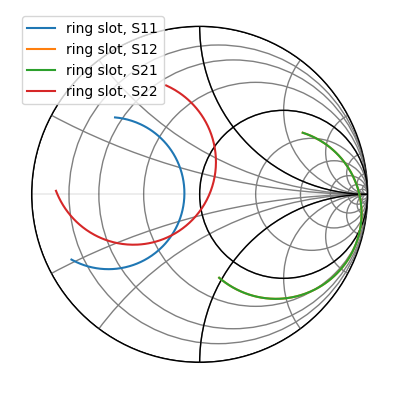

In [13]:
ring_slot.plot_s_smith()

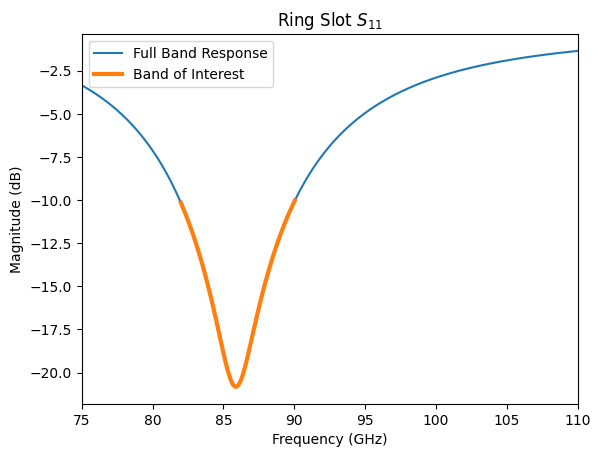

In [14]:
plt.title('Ring Slot $S_{11}$')

ring_slot.s11.plot_s_db(label='Full Band Response')
ring_slot.s11['82-90ghz'].plot_s_db(lw=3,label='Band of Interest')

In [15]:
from skrf.data import wr2p2_delayshort as delayshort
from skrf.data import wr2p2_short as short

In [16]:
short - delayshort
short + delayshort
short * delayshort
short / delayshort

1-Port Network: 'wr2p2,short',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j]

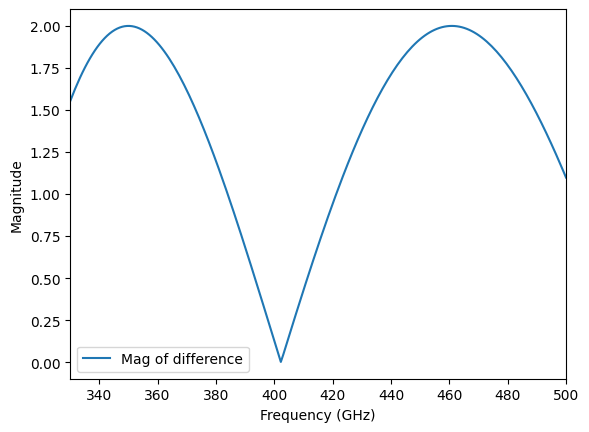

In [17]:
difference = (short - delayshort)
difference.plot_s_mag(label='Mag of difference')

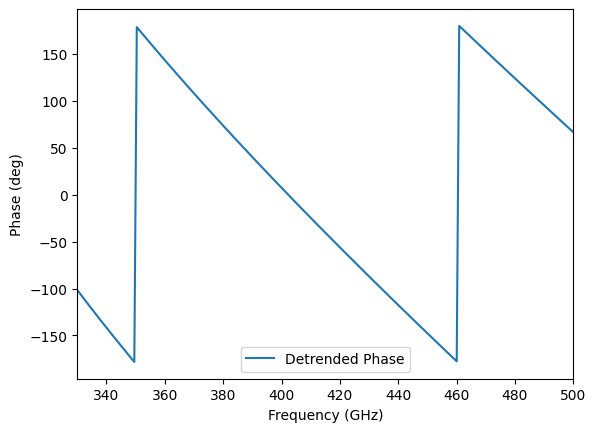

In [18]:
(delayshort/short).plot_s_deg(label='Detrended Phase')

In [19]:
hopen = (short*-1)
hopen.s[:3,...]

array([[[1.-0.j]],

       [[1.-0.j]],

       [[1.-0.j]]])

In [20]:
rando =  hopen *rng.uniform(size=len(hopen))
rando.s[:3,...]

array([[[0.73903662+0.j]],

       [[0.86365334+0.j]],

       [[0.28875254+0.j]]])

In [21]:
short == delayshort

False

In [22]:
short != delayshort

True

In [23]:
short = rf.data.wr2p2_short
line = rf.data.wr2p2_line
delayshort = line ** short

In [24]:
short_2 = line.inv ** delayshort

short_2 == short

True

In [25]:
tee = rf.data.tee
tee

3-Port Network: 'tee',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j 50.+0.j]

In [26]:
terminated_tee = rf.connect(tee, 1, delayshort, 0)
terminated_tee

2-Port Network: 'tee',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

In [27]:
from skrf.data import wr2p2_line1 as line1

line1

2-Port Network: 'wr2p2,line1',  330.0-500.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j]

In [28]:
line1+line.interpolate(line1.frequency)

2-Port Network: 'wr2p2,line1',  330.0-500.0 GHz, 101 pts, z0=[50.+0.j 50.+0.j]

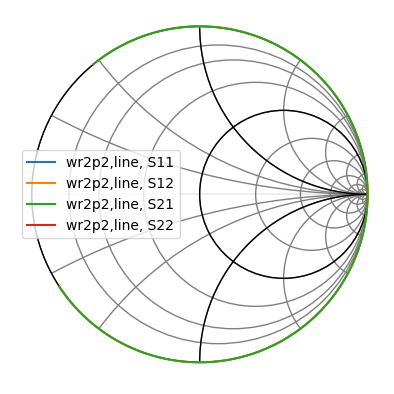

In [29]:
line.plot_s_smith()